In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install statsmodels
!pip install scipy
!pip install scikit-learn
!pip install seaborn
!pip install imblearn


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')

/tmp/ipykernel_4011/3311526514.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv')


In [3]:
###---------------------------------DATA CLEANING------------------------------###

In [4]:
cleaned_data = data

In [5]:
# Vehicle Make cleaning
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['TOYT','TOYO','TOYTA', 'TOY'], 'TOYOTA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('HOND', 'HONDA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['CHEVY', 'CHEV','CHEYV'], 'CHEVROLET')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('NISS', 'NISSAN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['HYUN','HYUNDIA','HYUNUNDAI','HYUNUDAI','HYUUNDAI'], 'HYUNDAI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['MERCEDES-BE','MERCEDESS','MERCEDES ZBENZ','MERCEDES ENZ','MERCEDEZ BENS','MERCEDS','MERDECES','MERCRDEZ BENZ','MERCEZ','MERCENDES','MERCEES','MERCEEDEZ','MERCEES','MERZ','MERCEDES', 'MERC','MERCEDES BENZ','MERCEDEZ','MEZ','MERZEDEZ','MERZEDES BENZ','MERZ 4S','MERX','MERS-BENZ','MERECEDEZ','MERDEDES','MERDECES-BENZ','MERCRY','MERDECES-BENZ'], 'MERCEDES-BENZ')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['VOLK','VOLKS','VW'], 'VOLKSWAGEN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('ACUR', 'ACURA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('SUBA', 'SUBARU')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('DODG', 'DODGE')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['THOM', 'THOMAS','THMS'], 'THOMAS BUILT')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('MAZD', 'MAZDA')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['LEXS','LEXU','LESUX','LEXUUS','LEXUSZ','LEXUSS','LEXI'], 'LEXUS')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('FRHT', 'FREIGHTLINER')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('VOLV', 'VOLVO')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('INFI', 'INFINITI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['GILL','GILG','GILLLIG BU','GILLS','GILLMAN'],'GILLIG')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('CHRY', 'CHRYSLER')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('BUIC', 'BUICK')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['CADI','CADDILAC','CADILACC','CADILLA'], 'CADILLAC')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace(['INFINITY','INFINITIG'], 'INFINITI')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('LINC', 'LINCOLN')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('INTL', 'INTERNATIONAL')
cleaned_data['Vehicle Make'] = cleaned_data['Vehicle Make'].replace('NISSIAN', 'NISSAN')

#Substance cleaning
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].str.upper()
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].replace('UNKNOWN, UNKNOWN', 'UNKNOWN')
cleaned_data['Driver Substance Abuse'] = cleaned_data['Driver Substance Abuse'].replace('SUSPECT OF ALCOHOL USE, UNKNOWN', 'SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE')

#Traffic controls
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].replace('TRAFFIC CONTROL SIGNAL', 'TRAFFIC SIGNAL')
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].replace('FLASHING TRAFFIC CONTROL SIGNAL','FLASHING TRAFFIC SIGNAL')
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].fillna('UNKNOWN')

# Weather
cleaned_data['Weather'] = cleaned_data['Weather'].str.upper()
cleaned_data['Weather'] = cleaned_data['Weather'].fillna('UNKNOWN')


#Surface condition
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].str.upper()
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].replace(['WATER(STANDING/MOVING)','WATER (STANDING, MOVING)'],'WET')
cleaned_data['Surface Condition'] = cleaned_data['Surface Condition'].replace('ICE/FROST','ICE')


#Light
cleaned_data['Light'] = cleaned_data['Light'].str.upper()
cleaned_data['Light'] = cleaned_data['Light'].replace('DARK - LIGHTED','DARK LIGHTS')
cleaned_data['Light'] = cleaned_data['Light'].replace('DARK - NOT LIGHTED','DARK NO LIGHTS')
cleaned_data['Light'] = cleaned_data['Light'].replace(['DARK -- UNKNOWN LIGHTING','DARK - UNKNOWN LIGHTING'],'DARK')

In [6]:
cleaned_data['Vehicle Damage Extent'] = cleaned_data['Vehicle Damage Extent'].str.upper()

In [7]:
cleaned_data['Traffic Control'] = cleaned_data['Traffic Control'].str.upper()


In [8]:
##Add new numeric columns for Vehicle Damage Extent and Injury Severity

vehicle_mapping = {"NO DAMAGE":0, "SUPERFICIAL":1.5, "FUNCTIONAL":3, "DISABLING":6, "DESTROYED":10,"UNKNOWN":None,"VEHICLE NOT AT SCENE":None,"OTHER":None}
injury_mapping = {"NO APPARENT INJURY":0, "POSSIBLE INJURY":1, "SUSPECTED MINOR INJURY":2, "SUSPECTED SERIOUS INJURY":5, "FATAL INJURY":10}

cleaned_data['Vehicle Damage Numeric'] = cleaned_data['Vehicle Damage Extent'].map(vehicle_mapping)
cleaned_data['Injury Severity Numeric'] = cleaned_data['Injury Severity'].map(injury_mapping)

In [9]:
##clean up

#fill in wrong vehicle year values (values greater than 2025 or less than 1940) with median vehicle year
df_filled = cleaned_data.copy()
mean_in_range = df_filled.loc[(df_filled['Vehicle Year'] >= 1940) & (df_filled['Vehicle Year'] <= 2025),'Vehicle Year'].median()
df_filled['Vehicle Year'] = df_filled['Vehicle Year'].apply(lambda x: 0 if (x < 1940) | (x > 2025) else x)
df_filled.describe(include='all')

##Create Crash Year, Month, and Hour Columns from general date/time string
df_filled['Crash Year'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.year
df_filled['Crash Month'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.month
df_filled['Crash Hour'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.hour



/tmp/ipykernel_4011/2462441591.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filled['Crash Year'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.year
/tmp/ipykernel_4011/2462441591.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filled['Crash Month'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.month
/tmp/ipykernel_4011/2462441591.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filled['Crash Hour'] = pd.to_datetime(df_filled['Crash Date/Time']).dt.hour


In [10]:
#traffic controls
df_filled['Traffic Control'] = df_filled['Traffic Control'].str.lower()
cond5 = [
    df_filled['Traffic Control'] == 'no controls',
    df_filled['Traffic Control'].isin(['traffic signal','traffic control signal','flashing traffic signal','flashing traffic control signal']),
    df_filled['Traffic Control'] == 'stop sign',
    df_filled['Traffic Control'].isin(['nan','unknown'])
]
choice5 = ['none','traffic signal','stop sign','unknown']
df_filled['Traffic Control'] = np.select(cond5, choice5, default='other')

#agency name
df_filled['Agency Name'] = df_filled['Agency Name'].str.lower()
cond8 = [
    df_filled['Agency Name'].isin(['montgomery county police','montgomery']),
    df_filled['Agency Name'].isin(['rockville police departme','rockville']),
    df_filled['Agency Name'].isin(['gaithersburg police depar','gaithersburg']),
    df_filled['Agency Name'].isin(['takoma park police depart','takoma']),
    df_filled['Agency Name'].isin(['maryland-national capital','mcpark']),
]
choice8 = ['Montgomery County Police','Rockville Police Department','Gaithersburg Police Department','Takoma Park Police Department','Maryland-National Capital Park']
df_filled['Agency Name'] = np.select(cond8, choice8, default='other')

In [11]:
df_filled['Vehicle Year'] = df_filled['Vehicle Year'].astype(int)

In [12]:
##export to new CSV for work in tableau and reset cleaned data for ivans work
df_filled.to_csv("Crash_Reporting_Cleaned_new.csv")
cleaned_data = df_filled.copy()

In [13]:
###---------------------------EDA-----------------------------###

In [14]:
# Find injury severity conditionalized on impact direction


In [15]:
c_df = df_filled

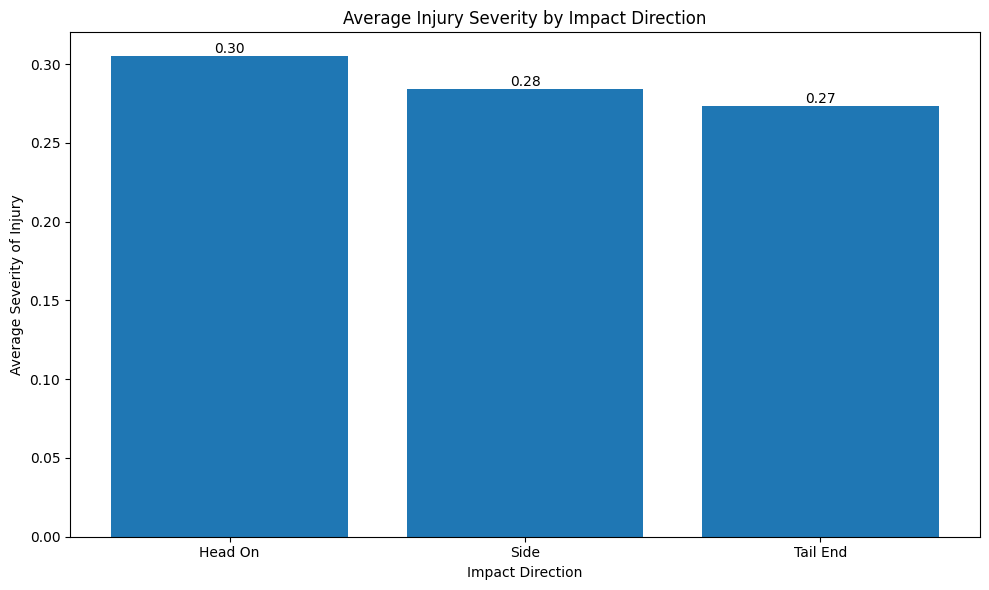

In [16]:
# Group and graph impact direction

impact_direction = {
    'TWELVE OCLOCK': 'Head On',
    'ONE OCLOCK': 'Head On',
    'TWO OCLOCK': 'Side',
    'THREE OCLOCK': 'Side',
    'FOUR OCLOCK': 'Side',
    'FIVE OCLOCK': 'Tail End',
    'SIX OCLOCK': 'Tail End',
    'SEVEN OCLOCK': 'Tail End',
    'EIGHT OCLOCK': 'Side',
    'NINE OCLOCK': 'Side',
    'TEN OCLOCK': 'Side',
    'ELEVEN OCLOCK': 'Head On'
}

c_df['impact_direction'] = c_df['Vehicle First Impact Location'].map(impact_direction)

c_grouped_df = c_df.groupby('impact_direction')['Injury Severity Numeric'].agg(['mean', 'count']).reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(c_grouped_df['impact_direction'], c_grouped_df['mean'])

plt.title('Average Injury Severity by Impact Direction')
plt.xlabel('Impact Direction')
plt.ylabel('Average Severity of Injury')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

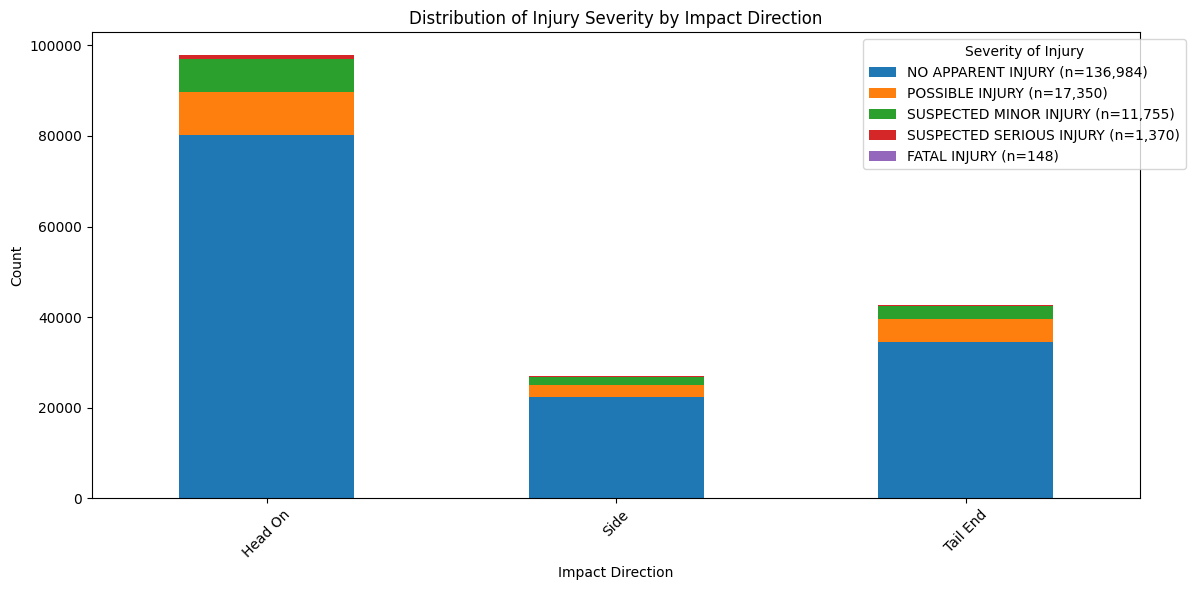

In [17]:
# Create grouped dataframe with absolute counts
c_grouped_df = c_df.groupby(['impact_direction', 'Injury Severity']).size().unstack(fill_value=0)

# Define order with separate categories
severity_order = ['NO APPARENT INJURY', 'POSSIBLE INJURY', 'SUSPECTED MINOR INJURY', 'SUSPECTED SERIOUS INJURY', 'FATAL INJURY']
c_grouped_df = c_grouped_df[severity_order]

# Calculate totals for legend
totals = c_grouped_df.sum()
legend_labels = [f'{cat} (n={totals[cat]:,})' for cat in severity_order]

# Create plot
fig, ax = plt.subplots(figsize=(12, 6))
c_grouped_df.plot(kind='bar', stacked=True, ax=ax)

plt.title('Distribution of Injury Severity by Impact Direction')
plt.xlabel('Impact Direction')
plt.ylabel('Count')
plt.legend(title='Severity of Injury', 
          labels=legend_labels,
          bbox_to_anchor=(1.05, 1))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
###-----------------------Modeling---------------------###

In [19]:
# Create model df

feature_names = ['Speed Limit', 'Vehicle Movement', 'Light', 'Surface Condition', 'Weather']
target_name = 'Injury Severity'
model_columns = feature_names + [target_name]

modeling_df = c_df[model_columns]
modeling_df.head()



,Speed Limit,Vehicle Movement,Light,Surface Condition,Weather,Injury Severity
0,0,PARKED,DAYLIGHT,NaN,CLEAR,NO APPARENT INJURY
1,5,PARKING,DAYLIGHT,NaN,CLEAR,NO APPARENT INJURY
2,15,BACKING,DAYLIGHT,NaN,CLEAR,NO APPARENT INJURY
3,15,MOVING CONSTANT SPEED,DAYLIGHT,NaN,CLEAR,NO APPARENT INJURY
4,35,MOVING CONSTANT SPEED,DARK LIGHTS ON,DRY,CLEAR,NO APPARENT INJURY


In [20]:
# Encode variables to numeric values (just for model internals, still classification)

modeling_df = modeling_df.dropna(subset=target_name)

def cast_to_upper(x):
    return x.upper() 
modeling_df[target_name] = modeling_df[target_name].apply(cast_to_upper)

# Encode variables and clean features
X = pd.DataFrame()
label_encoders = {}
for feature in feature_names:
    if modeling_df[feature].dtype == 'object':
        modeling_df[feature] = modeling_df[feature].fillna('UNKNOWN')
        modeling_df[feature] = modeling_df[feature].astype(str).str.upper()
        
        label_encoders[feature] = LabelEncoder()
        X[feature] = label_encoders[feature].fit_transform(modeling_df[feature])
    else:
        X[feature] = modeling_df[feature]

encoded_target = LabelEncoder()
y = encoded_target.fit_transform(modeling_df[target_name])

In [21]:
###----------Model 1----------###
#Tested with and without smote and class balancing, poor results.

In [22]:
# Set up model and train-test split

###---------Trying with balancing--------###
from imblearn.over_sampling import SMOTE

# First apply SMOTE to balance classes
smote = SMOTE(random_state=10)

# Then train with balanced class weights

###---------Trying with balancing--------###

random_forest = RandomForestClassifier(n_estimators=50, max_depth=15, 
                                       min_samples_split=5, min_samples_leaf=2, 
                                       max_features='sqrt', random_state=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Try with balancing
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [23]:
# Run model

random_forest.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=10)

In [24]:
# Make predictions

y_pred = random_forest.predict(X_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.26      0.01        43
           1       0.89      0.32      0.47     31243
           2       0.12      0.30      0.17      3724
           3       0.08      0.13      0.10      2674
           4       0.01      0.42      0.02       324

    accuracy                           0.31     38008
   macro avg       0.22      0.28      0.16     38008
weighted avg       0.75      0.31      0.41     38008



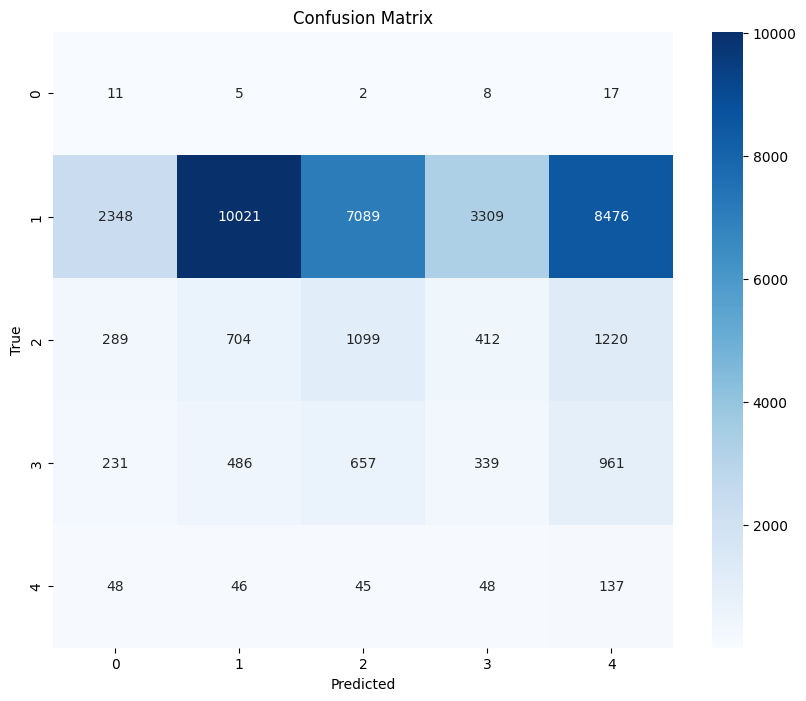

In [25]:
# Evaluate performance 

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [26]:
###---------Model 2----------###
# Use smote and grid search to find the optimal paramaters

In [27]:
# Setup model and train-test split
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pickle

# Use pipeline to ensure consistency
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [10, 15, None],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['sqrt', 'log2']
}

# COMMENTED OUT SO GRID SEARCH DOES NOT RUN -- GRID SEARCH SAVED IN FILE

#grid_search = GridSearchCV(pipeline, param_grid,cv=5 ,scoring='balanced_accuracy', n_jobs=-1, verbose=2)

#grid_search.fit(X_train, y_train)

# Save Results
#with open('grid_search_results.pkl', 'wb') as f:
#    pickle.dump(grid_search, f)

#print("Best parameters:", grid_search.best_params_)
#print("Best cross-validation score:", grid_search.best_score_)

In [28]:
# Use the best model and generate results, generate ROC graph

# Load the grid search from above
with open('grid_search_results.pkl', 'rb') as f:
    grid_search = pickle.load(f)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Create feature importances
importances = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.named_steps['classifier'].feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(importances)

# Create report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Feature Importance:
             feature  importance
1   Vehicle Movement    0.350021
0        Speed Limit    0.259600
2              Light    0.228148
4            Weather    0.085642
3  Surface Condition    0.076588

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.33      0.01        43
           1       0.89      0.31      0.46     31243
           2       0.12      0.32      0.18      3724
           3       0.09      0.10      0.09      2674
           4       0.01      0.42      0.02       324

    accuracy                           0.30     38008
   macro avg       0.22      0.29      0.15     38008
weighted avg       0.75      0.30      0.40     38008



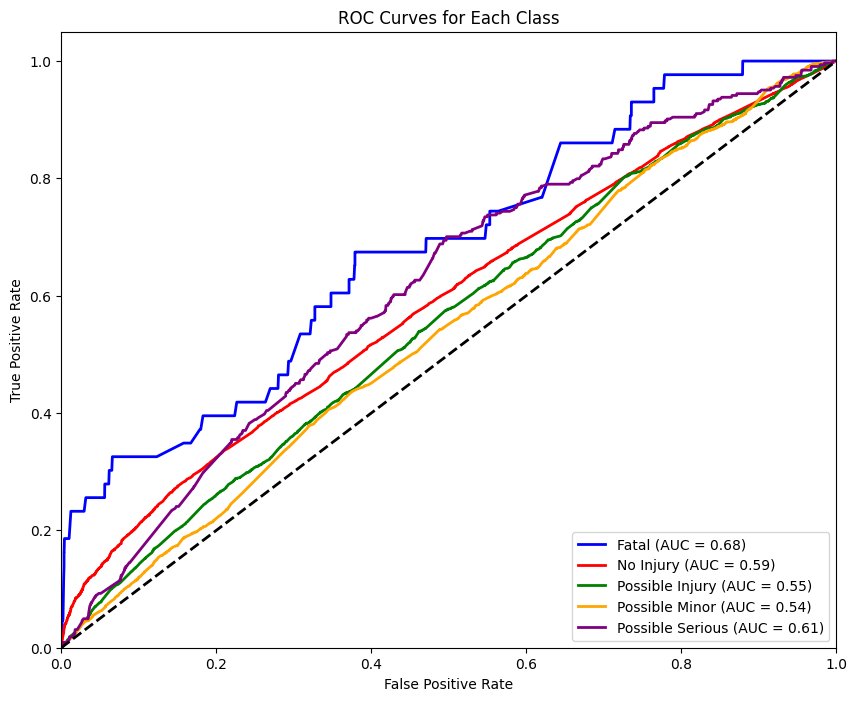


AUC scores for each class:
Fatal: 0.678
No Injury: 0.588
Possible Injury: 0.554
Possible Minor: 0.539
Possible Serious: 0.615


In [29]:
# ROC Curve
y_prob = best_model.predict_proba(X_test)

# Create ROC curve ---
false_pr = dict()
true_pr = dict()
roc_auc = dict()

for i in range(5):
    false_pr[i], true_pr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(false_pr[i], true_pr[i])

plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']
labels = ['Fatal', 'No Injury', 'Possible Injury', 'Possible Minor', 'Possible Serious']

zipped = zip(range(5), colors, labels)
for i, color, label in zipped:
    plt.plot(false_pr[i], true_pr[i], color=color, lw=2,
             label=f'{label} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend(loc="lower right")
plt.show()

print("\nAUC scores for each class:")
for i, label in enumerate(labels):
    print(f"{label}: {roc_auc[i]:.3f}")

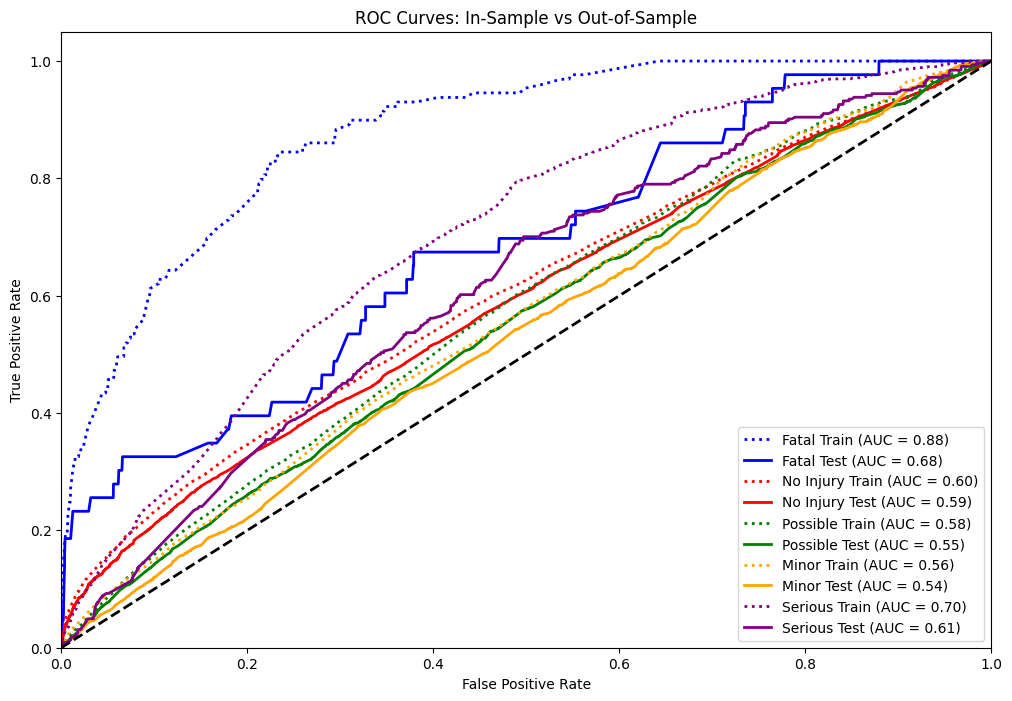


AUC score differences:
Fatal:
  In-sample (Train): 0.878
  Out-of-sample (Test): 0.678
  Difference: 0.200
No Injury:
  In-sample (Train): 0.603
  Out-of-sample (Test): 0.588
  Difference: 0.015
Possible:
  In-sample (Train): 0.576
  Out-of-sample (Test): 0.554
  Difference: 0.023
Minor:
  In-sample (Train): 0.564
  Out-of-sample (Test): 0.539
  Difference: 0.025
Serious:
  In-sample (Train): 0.700
  Out-of-sample (Test): 0.615
  Difference: 0.085


In [30]:
# Create ROC curves for train and test seperately on the same graph

y_train_prob = best_model.predict_proba(X_train)
y_test_prob = best_model.predict_proba(X_test)

false_pr_train = dict()
true_pr_train = dict()
roc_auc_train = dict()
false_pr_test = dict()
true_pr_test = dict()
roc_auc_test = dict()

for i in range(5):
    false_pr_train[i], true_pr_train[i], _ = roc_curve(y_train == i, y_train_prob[:, i])
    roc_auc_train[i] = auc(false_pr_train[i], true_pr_train[i])
    
    false_pr_test[i], true_pr_test[i], _ = roc_curve(y_test == i, y_test_prob[:, i])
    roc_auc_test[i] = auc(false_pr_test[i], true_pr_test[i])

plt.figure(figsize=(12, 8))
labels = ['Fatal', 'No Injury', 'Possible', 'Minor', 'Serious']
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i, (color, label) in enumerate(zip(colors, labels)):
    plt.plot(false_pr_train[i], true_pr_train[i], color=color, linestyle=':', lw=2,
             label=f'{label} Train (AUC = {roc_auc_train[i]:.2f})')
    plt.plot(false_pr_test[i], true_pr_test[i], color=color, linestyle='-', lw=2,
             label=f'{label} Test (AUC = {roc_auc_test[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: In-Sample vs Out-of-Sample')
plt.legend(loc="lower right")
plt.show()

print("\nAUC score differences:")
for i, label in enumerate(labels):
    print(f"{label}:")
    print(f"  In-sample (Train): {roc_auc_train[i]:.3f}")
    print(f"  Out-of-sample (Test): {roc_auc_test[i]:.3f}")
    print(f"  Difference: {roc_auc_train[i] - roc_auc_test[i]:.3f}")

In [31]:
###--------Model 3--------###
# Use a binary variable for injured vs not injured

In [32]:
# Create variable and define features

feature_names = ['Speed Limit', 'Vehicle Movement', 'Light', 'Surface Condition', 'Weather']
target_name = 'Injury Severity'
model_columns = feature_names + [target_name]

modeling_df = c_df[model_columns]
modeling_df.head()


,Speed Limit,Vehicle Movement,Light,Surface Condition,Weather,Injury Severity
0,0,PARKED,DAYLIGHT,NaN,CLEAR,NO APPARENT INJURY
1,5,PARKING,DAYLIGHT,NaN,CLEAR,NO APPARENT INJURY
2,15,BACKING,DAYLIGHT,NaN,CLEAR,NO APPARENT INJURY
3,15,MOVING CONSTANT SPEED,DAYLIGHT,NaN,CLEAR,NO APPARENT INJURY
4,35,MOVING CONSTANT SPEED,DARK LIGHTS ON,DRY,CLEAR,NO APPARENT INJURY


In [33]:
# Encode variables to numeric values (just for model internals)

modeling_df = modeling_df.dropna(subset=target_name)

def cast_to_upper(x):
    return x.upper() 
modeling_df[target_name] = modeling_df[target_name].apply(cast_to_upper)

# Create binary variable
modeling_df['Injury_Binary'] = np.where(modeling_df['Injury Severity'] == 'NO APPARENT INJURY', 0, 1)

# Rename target 
target_name = 'Injury_Binary'

# Clean features and encode variables
X = pd.DataFrame()
label_encoders = {}
for feature in feature_names:
    if modeling_df[feature].dtype == 'object':
        modeling_df[feature] = modeling_df[feature].fillna('UNKNOWN')
        modeling_df[feature] = modeling_df[feature].astype(str).str.upper()
        
        label_encoders[feature] = LabelEncoder()
        X[feature] = label_encoders[feature].fit_transform(modeling_df[feature])
    else:
        X[feature] = modeling_df[feature]

encoded_target = LabelEncoder()
y = encoded_target.fit_transform(modeling_df[target_name])

In [34]:
# Split the data in to train and test and run a GridSearch for the best paramaters

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

paramater_grid = {
    'n_estimators': [200, 300, 400],
    'max_depth': [10, 12, 14, 18, 20],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample'],
    'max_features': ['sqrt', 'log2']
}
# Create random forest, bootstrap samples
random_forest = RandomForestClassifier(random_state=10,
    n_jobs=-1,
    bootstrap=True
)

### COMMENTED OUT SO GRID SEARCH DOES NOT RUN --- SAVED IN FOLDER
#grid_search_3 = GridSearchCV(
#    estimator=random_forest,
#    param_grid=paramater_grid,
#    cv=3,
#    n_jobs=-1,
#    scoring='f1_weighted',
#    verbose=2
#)

#grid_search_3.fit(X_train, y_train)


In [35]:
# Use the best model and generate predictions

with open('grid_search_results_3.pkl', 'rb') as f:
    grid_search_3 = pickle.load(f)
    
best_rf = grid_search_3.best_estimator_
y_pred = best_rf.predict(X_test)


In [36]:
# Print model results

print("Best parameters:", grid_search_3.best_params_)
print("Best cross-validation score:", grid_search_3.best_score_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': best_model.named_steps['classifier'].feature_importances_
})

print("\nFeature Importance:")
print(feature_importance.sort_values('importance', ascending=False))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Best parameters: {'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation score: 0.30166775884454844

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.10      0.18     31243
           1       0.11      0.17      0.13      6765
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.11     38008
   macro avg       0.18      0.05      0.06     38008
weighted avg       0.67      0.11      0.17     38008


Feature Importance:
             feature  importance
1   Vehicle Movement    0.350021
0        Speed Limit    0.259600
2              Light    0.228148
4            Weather    0.085642
3  Surface Condition    0.076588

Confusion Matrix:
[[3113 9652 7703 2351 8424]
 [ 794 1161 1931  57

/home/chris/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/chris/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/chris/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


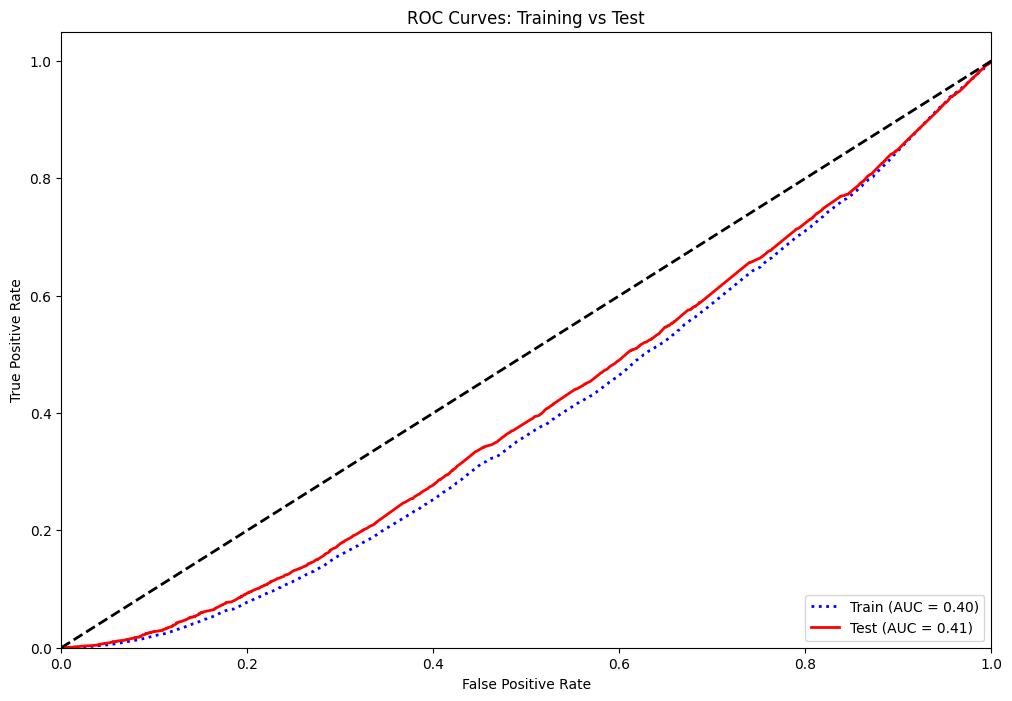


AUC score comparison:
Training AUC: 0.397
Test AUC: 0.412
Difference: -0.015


In [37]:
# Graph ROC curve for train and test data

y_train_prob = best_rf.predict_proba(X_train)
y_test_prob = best_rf.predict_proba(X_test)

# Train 
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob[:, 1])
roc_auc_train = auc(fpr_train, tpr_train)

# Test 
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob[:, 1])
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(12, 8))
plt.plot(fpr_train, tpr_train, color='blue', linestyle=':', lw=2,
         label=f'Train (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='red', linestyle='-', lw=2,
         label=f'Test (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves: Training vs Test')
plt.legend(loc="lower right")
plt.show()

print("\nAUC score comparison:")
print(f"Training AUC: {roc_auc_train:.3f}")
print(f"Test AUC: {roc_auc_test:.3f}")
print(f"Difference: {roc_auc_train - roc_auc_test:.3f}")